Data import


In [1]:
import csv    #for the cvs and txv files
import sqlite3 as slq   #for the db file
import pandas as pd    #Help visualize the data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Sample the dataset


In [2]:
df_1 = pd.read_csv("data/tmdb.movies.csv.gz")    #Main use, pull best and worst genre based on rating
df_1.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
df_2 = pd.read_csv("data/tn.movie_budgets.csv.gz")
df_2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


https://docs.python.org/3/library/codecs.html#standard-encodings - Helped with finding valid encoding 

In [4]:
df_3 = pd.read_csv('data/rt.reviews.tsv.gz',delimiter = '\t', encoding = 'cp437' )
df_3.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [5]:
df_4 = pd.read_csv('data/rt.movie_info.tsv.gz',delimiter = '\t')
df_4.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
df_5 = pd.read_csv('data/bom.movie_gross.csv.gz',delimiter = '\t')
df_5.head()

,"title,studio,domestic_gross,foreign_gross,year"
0,"Toy Story 3,BV,415000000.0,652000000,2010"
1,"Alice in Wonderland (2010),BV,334200000.0,6913..."
2,"Harry Potter and the Deathly Hallows Part 1,WB..."
3,"Inception,WB,292600000.0,535700000,2010"
4,"Shrek Forever After,P/DW,238700000.0,513900000..."


Deep look in tmdb movie file

The movie DB 
Useful keys: Popularity, vote count, vote average

In [7]:
####   Data Cleaning    ###
print(df_1.info())    #Unknown column
df_1['Unnamed: 0']    #No use, index column
df_1.drop("Unnamed: 0", axis = 1, inplace= True)   #Remove the column
df_1.columns    #Confirm the drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [8]:
###    Check missing values    ###
print (df_1.isna().sum())    #No NaN values
print (df_1.isnull().sum())    #No Null Values


genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [9]:
print(df_1.columns)
df_1['genre_ids']    #What does these numbers mean? - 
df_1['id']    #Each movie has a unique id? 
df_1['original_language']    #Only english movies? - No, there are multiples
df_1['original_title']     #Title of the movie
df_1['popularity']    #Ranking out of ... 100 , Website looks like percentage - based on amount timed watched?
df_1.sort_values('popularity').tail()
#Release data, title are pretty obvious, may need to look in title vs original title
df_1.loc[df_1['vote_average'] == 0]  #Quite a few with not votes and therefore no vote average
#df_1['vote_average'].plot(kind = 'hist')    #- Suject to remove with no votes
#df_1.sort_values(by ='vote_count')

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2467,[],331998,en,Edie: Girl on Fire,0.600,2010-01-01,Edie: Girl on Fire,0.0,1
4078,"[28, 27, 878, 37]",57817,en,Red River,0.875,2011-05-05,Red River,0.0,1
4282,[35],41840,en,Tom Wilson: Bigger Than You,0.666,2011-12-09,Tom Wilson: Bigger Than You,0.0,1
5176,"[18, 9648, 53]",102678,en,Dead Write,0.600,2011-01-01,Dead Write,0.0,1
5177,[18],81267,hi,क्षय,0.600,2011-10-08,Corrode,0.0,1
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [10]:
###    Remove dups    ###
df_1.duplicated().sum()    #There are duplicated movies? Multiple languages?
df_1[df_1.duplicated(keep = False)].sort_values(by = 'id')    #Looks like straight copies - Need to remove
df_1.drop_duplicates(inplace = True)    #Remove dups
df_1.duplicated().sum()   #Check again for dups


0

In [11]:
#Sort by popularity to see whats type of movies are the best
df_1.sort_values('popularity', inplace = True,ascending= False)
df1_top_movies = df_1[0:100]
df1_worst_movie = df_1[-100:]

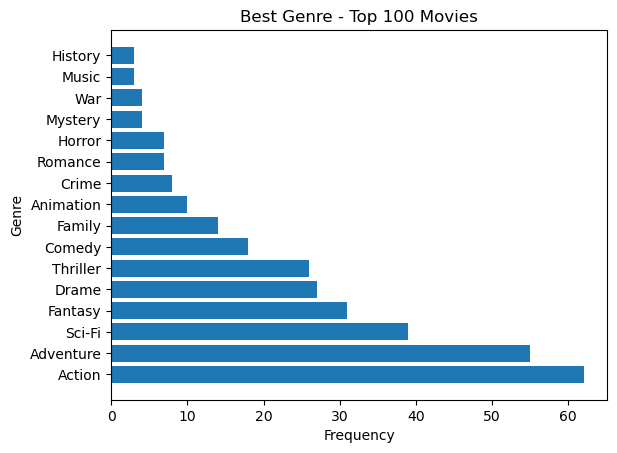

In [44]:
convert = {'28' : 'Action', '12': 'Adventure', '35': 'Comedy', '99': 'Documentary', 
           '18': 'Drame', '14': 'Fantasy', '27': 'Horror', '878' : 'Sci-Fi', '53' : 'Thriller',
           '16': 'Animation', '80' : 'Crime', '99': 'Documentary', '10751' : 'Family',
           '14':'Fantasy', "36" : 'History','27': 'Horror', '10402':'Music',
           '9648':'Mystery','10749':'Romance','10770': 'TV Movie','10752': 'War','37':'Western' }
def count_genre(df_list):
    genre_count = {}    #https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee
    for movie in df_list['genre_ids']:
        movie = movie.strip('[]')
        movie = movie.replace(' ', '')
        movie = movie.split(',')
        
        for genre in movie:
            if(genre_count.get(convert[genre])):
                genre_count[convert[genre]] += 1
            else:
                genre_count[convert[genre]] = 1
    return sorted(genre_count.items(), key = lambda x: x[1], reverse=True)
   
df1_top_genre = count_genre(df1_top_movies)
x, y = zip(*df1_top_genre)
fig1, ax1 = plt.subplots()
ax1 = plt.barh(x,y);
plt.xlabel("Frequency");
plt.ylabel("Genre");
plt.title("Best Genre - Top 100 Movies");


In [13]:
df_2.duplicated().sum()    #No dups?
df_2.isna().sum()    #No NaN
df_2.isnull().sum()    #No Null

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [14]:
###    Change the columns to integer for comparing and statistical methods    ###
df_2.info()
df_2['production_budget'] = df_2['production_budget'].map(lambda x: x.strip('$'))    #Take out the $
df_2['production_budget'] = df_2['production_budget'].map(lambda x: x.replace(',',''))    #Remove the , 
df_2['production_budget'] = df_2['production_budget'].astype('int64')    #Convert to int64

df_2['domestic_gross'] = df_2['domestic_gross'].map(lambda x: x.strip('$'))    #Take out the $
df_2['domestic_gross'] = df_2['domestic_gross'].map(lambda x: x.replace(',',''))    #Remove the , 
df_2['domestic_gross'] = df_2['domestic_gross'].astype('int64')

df_2['worldwide_gross'] = df_2['worldwide_gross'].map(lambda x: x.strip('$'))   #Take out the $
df_2['worldwide_gross'] = df_2['worldwide_gross'].map(lambda x: x.replace(',',''))    #Remove the , 
df_2['worldwide_gross'] = df_2['worldwide_gross'].astype('int64')
df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 no

<AxesSubplot:>

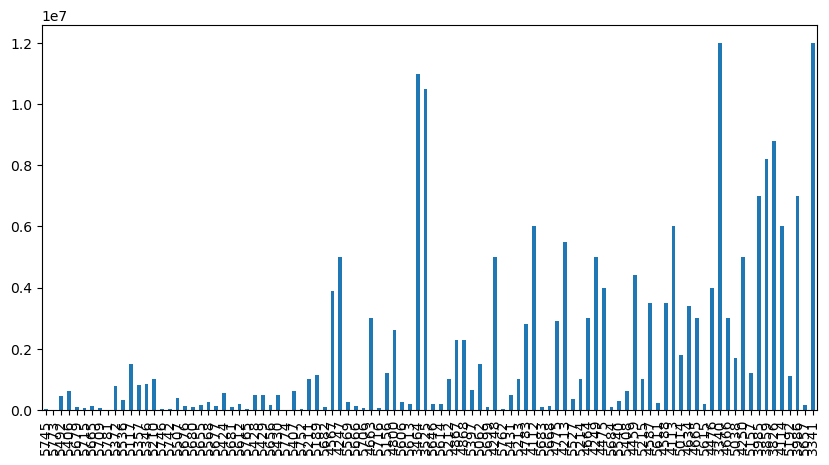

In [15]:
df_2
df_2['prod_dom_ratio'] = df_2['domestic_gross'] / df_2['production_budget']
df_2.sort_values(['prod_dom_ratio'], ascending= False, inplace= True)
df_2.head(10)     #One outlier...I see
#df_2.drop(5745, inplace = True)
#df_2.plot.scatter('production_budget','domestic_gross')
df_2['production_budget'][0:100].plot.bar(df_2['movie'], figsize = (10, 5))

In [16]:
ex = df_2['production_budget'][0]

In [17]:
ex = ex.strip('$')
ex = ex.replace(',', '')
ex

AttributeError: 'numpy.int64' object has no attribute 'strip'